In [85]:
# Importing main Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#Importing training dataset

train = pd.read_csv("/content/drive/My Drive/Dataset/Big Mart Sales/Big Mart Sales.csv")

In [87]:
#Importing test dataset

test = pd.read_csv("/content/drive/My Drive/Dataset/Big Mart Sales/Test.csv")

In [88]:
data = pd.concat([train,test],ignore_index=True)
data.shape

(14204, 12)

In [89]:
print(train.shape,test.shape)
print(train.shape[0]+test.shape[0])

(8523, 12) (5681, 11)
14204


In [90]:
data.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14194,FDA01,15.00,reg,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14196,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14197,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14198,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [91]:
data.shape

(14204, 12)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [93]:
#Extracting the unique values of each columns

for i in data.columns:
    print(i," : distinct_value")
    print(data[i].nunique(), ":No of unique values")
    print(data[i].unique())
    print("-"*30)
    print("")

Item_Identifier  : distinct_value
1559 :No of unique values
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
------------------------------

Item_Weight  : distinct_value
415 :No of unique values
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5

In [94]:
#We can see that we have some data missing

round(100*(data.isna().sum())/len(data), 2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.27
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales            40.00
dtype: float64

In [95]:
data[data==0].sum()

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [96]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,14204,1559,FDV36,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,11765,NaN,NaN,NaN,12.7929,4.6525,4.555,8.71,12.6,16.75,21.35
Item_Fat_Content,14204,5,Low Fat,8485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,14204,NaN,NaN,NaN,0.0659528,0.0514586,0,0.0270357,0.0540205,0.0940373,0.328391
Item_Type,14204,16,Fruits and Vegetables,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,14204,NaN,NaN,NaN,141.005,62.0869,31.29,94.012,142.247,185.856,266.888
Outlet_Identifier,14204,10,OUT027,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,14204,NaN,NaN,NaN,1997.83,8.37166,1985,1987,1999,2004,2009
Outlet_Size,10188,3,Medium,4655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,14204,3,Tier 3,5583,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a0f1dfb70>,
      dtype=object)

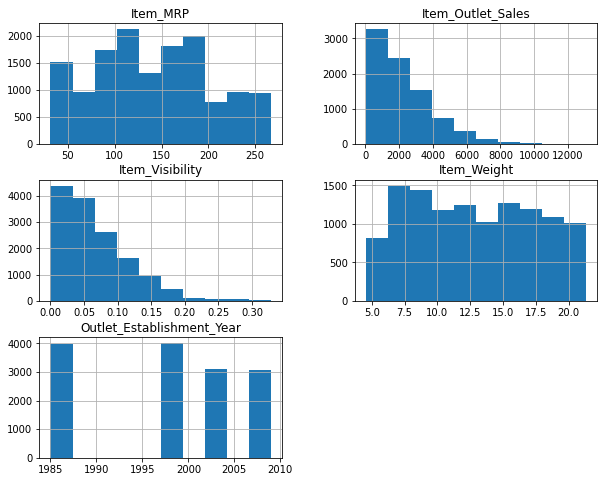

In [97]:
data.hist(figsize=(10,8))

In [98]:
#Filling the mssing data in Item_weight with mean
## Because every item should have some weight

li = list(data[data['Item_Weight'].isna()].index)
data['Item_Weight'][li] = float(data['Item_Weight'].mean())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [99]:
#Checking the Correlation between data with respect to target

data.corr()['Item_Outlet_Sales']

Item_Weight                  0.011083
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

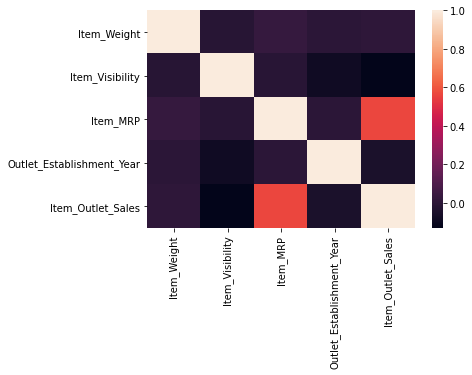

In [100]:
import seaborn as sns
sns.heatmap(data.corr())

In [101]:
'''

We saw that in Item_identifier 1st 2 character's are common and other characters describes about the product

So we can extract those characters to simplify our dataset

'''

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [102]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [103]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Type_Combined Item_Type                               
DR                 Dairy                       2.451782e+05
                   Hard Drinks                 4.577934e+05
                   Soft Drinks                 8.928977e+05
FD                 Baking Goods                1.265525e+06
                   Breads                      5.532372e+05
                   Breakfast                   2.322990e+05
                   Canned                      1.444151e+06
                   Dairy                       1.277416e+06
                   Frozen Foods                1.825735e+06
                   Fruits and Vegetables       2.820060e+06
                   Meat                        9.175656e+05
                   Seafood                     1.488682e+05
                   Snack Foods                 2.732786e+06
                   Starchy Foods               3.514013e+05
NC                 Health and Hygiene          1.045200e+06
                   Household                   2.055494e+06
                   Others                      3.255176e+05

In [104]:
'''
After we extract 1st 2 characters from Item_identifier we saw that it means to certain item type

so we can rename them accordingly

'''

data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [105]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [106]:
data.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Combined'],
      dtype=object)

In [107]:
# Rearranging the Columns 

## To get the better view of data

columns = ['Item_Identifier', 'Item_Type_Combined','Item_Type', 'Item_Fat_Content', 'Item_Weight', 'Item_Visibility',
        'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
data = data[columns]

In [108]:
data.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Food,Dairy,Low Fat,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Drinks,Soft Drinks,Regular,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Food,Meat,Low Fat,17.50,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Food,Fruits and Vegetables,Regular,19.20,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Non-Consumable,Household,Low Fat,8.93,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [109]:
#We saw that Outlet_size have some Nan Values
#So we are filling those values with Medium

data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')
data['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [110]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [111]:
#When we look at it we saw that ["LF"," Low Fat"," low fat"] & ["Regular","reg"] are same and using acronyms
## We are replacing all the values

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF','Low Fat')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat','Low Fat')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Type_Combined         14204 non-null  object 
 2   Item_Type                  14204 non-null  object 
 3   Item_Fat_Content           14204 non-null  object 
 4   Item_Weight                14204 non-null  float64
 5   Item_Visibility            14204 non-null  float64
 6   Item_MRP                   14204 non-null  float64
 7   Outlet_Identifier          14204 non-null  object 
 8   Outlet_Establishment_Year  14204 non-null  int64  
 9   Outlet_Size                14204 non-null  object 
 10  Outlet_Location_Type       14204 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usag

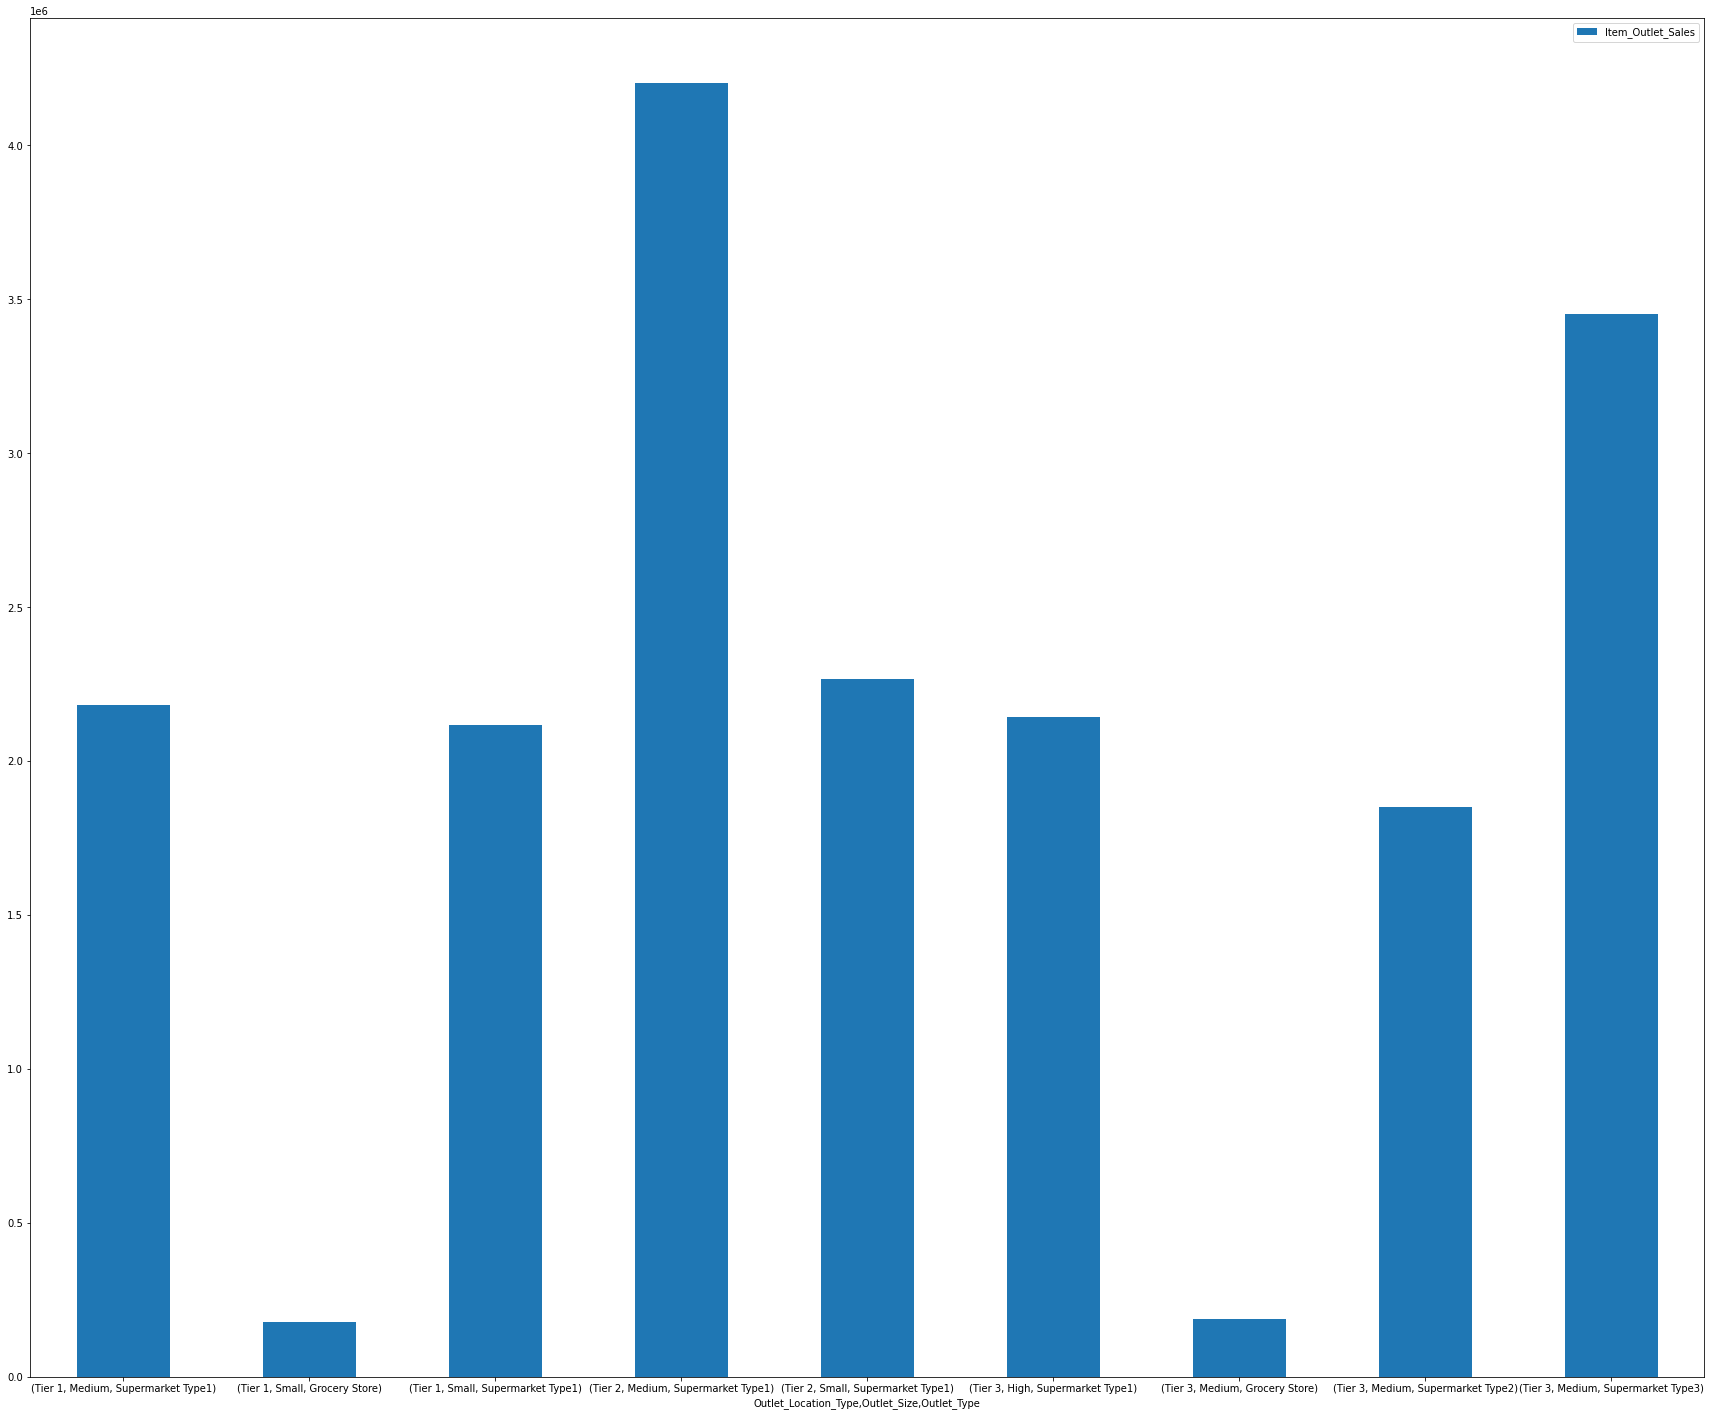

In [113]:
plot_outlet = data.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type'],aggfunc=np.sum)
plot_outlet.plot(kind='bar',figsize = (30,25))
plt.xticks(rotation=0)
plt.show()

In [114]:
data.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type'],aggfunc=np.sum)


Item_Outlet_Sales
Outlet_Location_Type Outlet_Size Outlet_Type                         
Tier 1               Medium      Supermarket Type1       2.183970e+06
                     Small       Grocery Store           1.796941e+05
                                 Supermarket Type1       2.118395e+06
Tier 2               Medium      Supermarket Type1       4.204191e+06
                     Small       Supermarket Type1       2.268123e+06
Tier 3               High        Supermarket Type1       2.142664e+06
                     Medium      Grocery Store           1.883402e+05
                                 Supermarket Type2       1.851823e+06
                                 Supermarket Type3       3.453926e+06

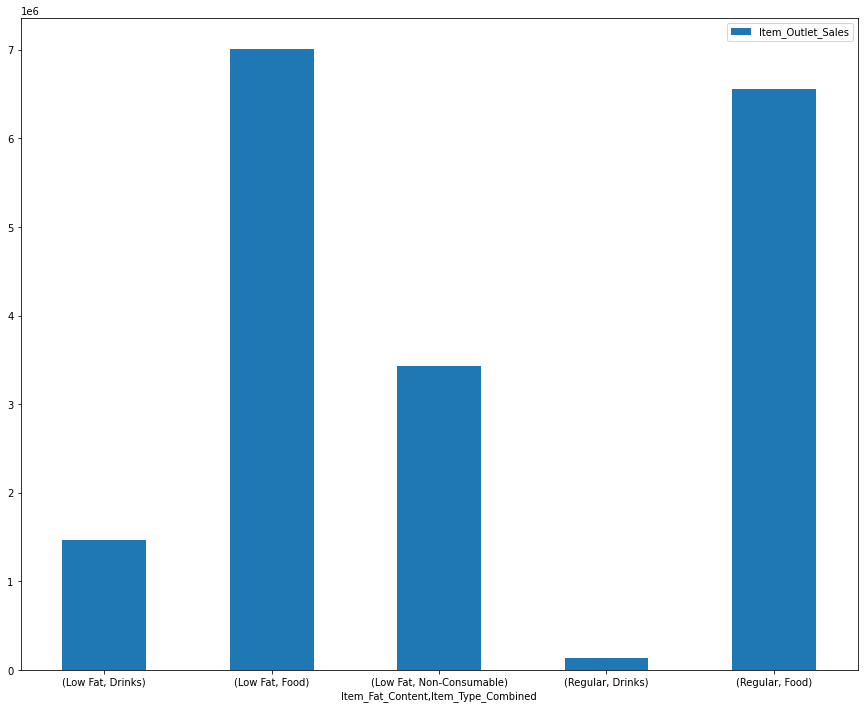

In [115]:
plot_item = data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined'],aggfunc='sum')
plot_item.plot(kind='bar',figsize = (15,12))
plt.xticks(rotation=0)
plt.show()

In [116]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          Drinks             Dairy                       2.451782e+05
                                    Hard Drinks                 4.577934e+05
                                    Soft Drinks                 7.612591e+05
                 Food               Baking Goods                5.805237e+05
                                    Breads                      3.056808e+05
                                    Breakfast                   9.944189e+04
                                    Canned                      7.531716e+05
                                    Dairy                       6.515046e+05
                                    Frozen Foods                9.528910e+05
                                    Fruits and Vegetables       1.374916e+06
                                    Meat                        3.460549e+05
                                    Seafood                     7.058812e+04
                                    Snack Foods                 1.669089e+06
                                    Starchy Foods               2.097909e+05
                 Non-Consumable     Health and Hygiene          1.045200e+06
                                    Household                   2.055494e+06
                                    Others                      3.255176e+05
Regular          Drinks             Soft Drinks                 1.316386e+05
                 Food               Baking Goods                6.850017e+05
                                    Breads                      2.475564e+05
                                    Breakfast                   1.328571e+05
                                    Canned                      6.909799e+05
                                    Dairy                       6.259113e+05
                                    Frozen Foods                8.728438e+05
                                    Fruits and Vegetables       1.445144e+06
                                    Meat                        5.715107e+05
                                    Seafood                     7.828010e+04
                                    Snack Foods                 1.063697e+06
                                    Starchy Foods               1.416103e+05

In [117]:
#From above table we saw that Non_Consumable goods don't fit with Low_Fat

## We we must change them to Other_Household

data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Household"

In [118]:
plot_identifier = data.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.sum)
plot_identifier

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,1.883402e+05
OUT013,2.142664e+06
OUT017,2.167465e+06
OUT018,1.851823e+06
OUT019,1.796941e+05
OUT027,3.453926e+06
OUT035,2.268123e+06
OUT045,2.036725e+06
OUT046,2.118395e+06


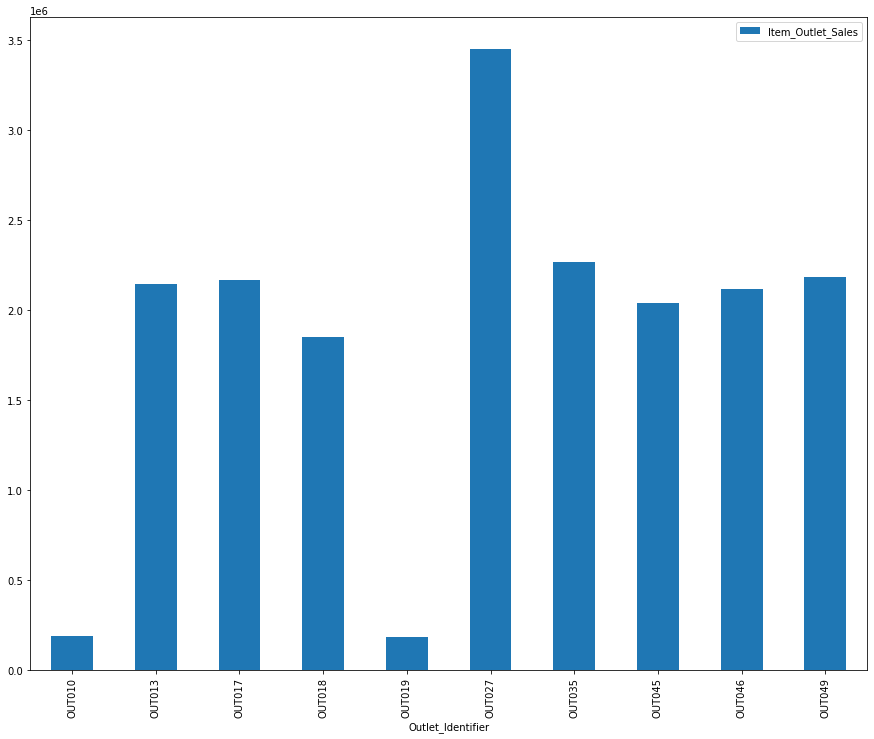

In [119]:
plot_identifier.plot(kind='bar',figsize = (15,12))
plt.show()

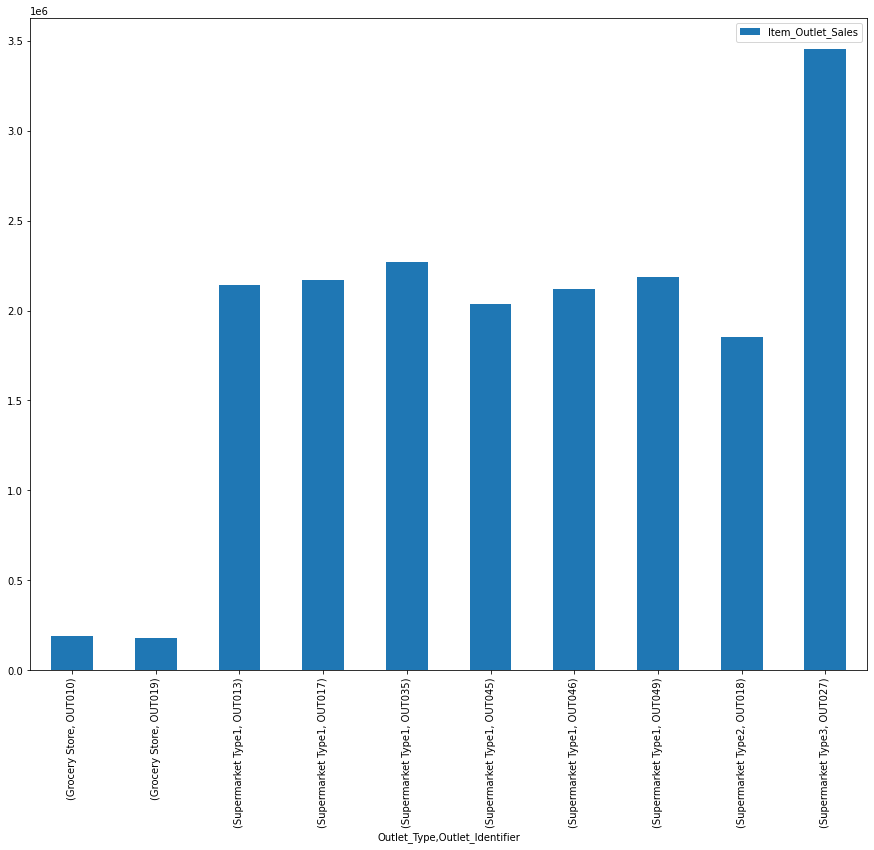

In [120]:
'''
Here we can see that Grocery Store's have low sales

Supermarket Type 1 have the most number of Outlet's

Supermarket Type 3 do highest sales

'''

data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Type','Outlet_Identifier'],aggfunc=np.sum).plot(kind='bar',figsize = (15,12))
plt.show()

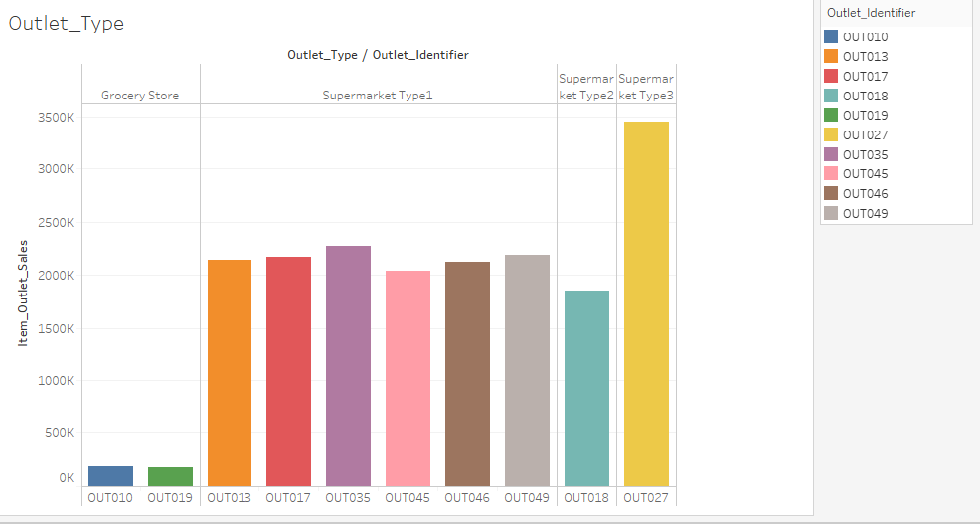

In [121]:
from PIL import Image as img
img.open("/content/drive/My Drive/Dataset/Big Mart Sales/Outlet_type.png")

In [122]:
data.pivot_table(values=['Item_Outlet_Sales'],index=['Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Size Outlet_Identifier                   
Grocery Store     Tier 1               Small       OUT019                  1.796941e+05
                  Tier 3               Medium      OUT010                  1.883402e+05
Supermarket Type1 Tier 1               Medium      OUT049                  2.183970e+06
                                       Small       OUT046                  2.118395e+06
                  Tier 2               Medium      OUT017                  2.167465e+06
                                                   OUT045                  2.036725e+06
                                       Small       OUT035                  2.268123e+06
                  Tier 3               High        OUT013                  2.142664e+06
Supermarket Type2 Tier 3               Medium      OUT018                  1.851823e+06
Supermarket Type3 Tier 3               Medium      OUT027                  3.453926e+06

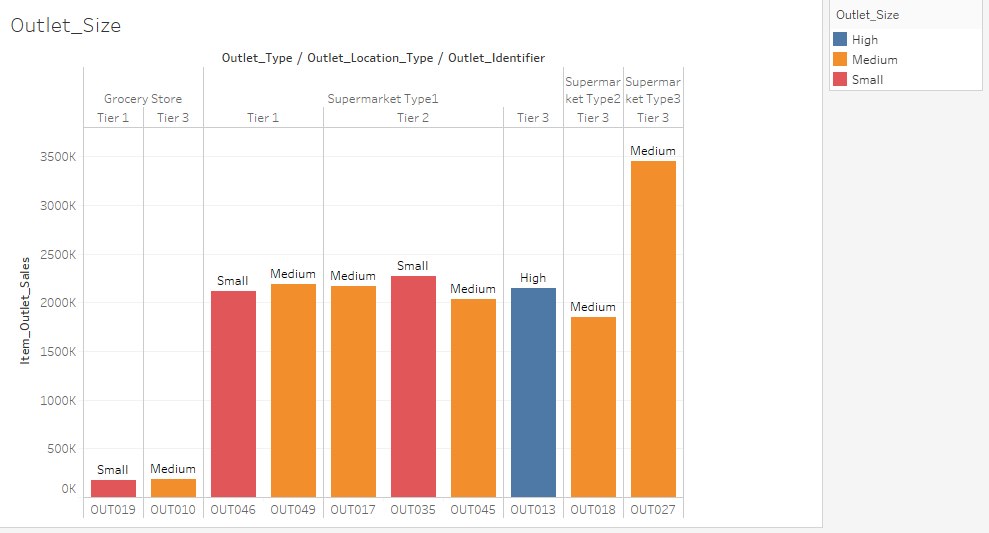

In [123]:
img.open("/content/drive/My Drive/Dataset/Big Mart Sales/Outlet_size.png")

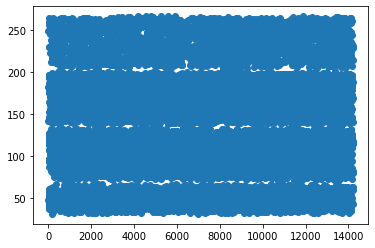

In [124]:
plt.scatter(data.index, data['Item_MRP'])

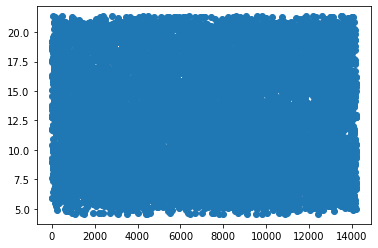

In [125]:
plt.scatter(data.index, data['Item_Weight'])

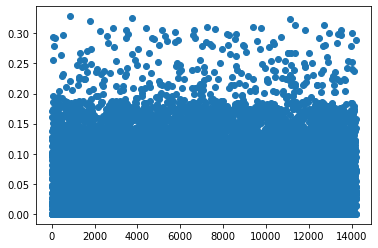

In [126]:
plt.scatter(data.index, data['Item_Visibility'])

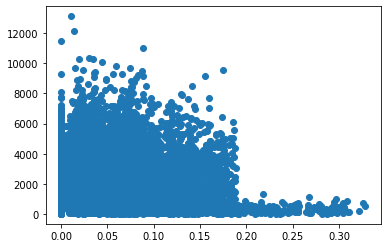

In [127]:
plt.scatter(data['Item_Visibility'],data['Item_Outlet_Sales'])

In [128]:
data.drop(['Item_Identifier'],axis=1,inplace=True)

In [129]:
data_copy = data.copy()

In [130]:
data = data_copy.iloc[0:train.shape[0]]

In [131]:
test_data = data_copy.iloc[train.shape[0]:]

In [132]:
print(data.shape,test_data.shape)

(8523, 12) (5681, 12)


In [133]:
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [134]:
df = data.copy()
df.shape

(8523, 12)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Type_Combined         8523 non-null   object 
 1   Item_Type                  8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Weight                8523 non-null   float64
 4   Item_Visibility            8523 non-null   float64
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [136]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
data.head()

,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,4,1,9.30,0.016047,249.8092,9,1999,1,0,1,3735.1380
1,0,14,2,5.92,0.019278,48.2692,3,2009,1,2,2,443.4228
2,1,10,1,17.50,0.016760,141.6180,9,1999,1,0,1,2097.2700
3,1,6,2,19.20,0.000000,182.0950,0,1998,1,2,0,732.3800
4,2,9,0,8.93,0.000000,53.8614,1,1987,0,2,1,994.7052


In [138]:
df.shape

(8523, 12)

In [139]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']

In [140]:
#kiki = np.log(y)

In [141]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(X,y, train_size=0.8, random_state=20)

In [142]:
from sklearn.metrics import mean_squared_error,r2_score

In [143]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
data_rf = rf.score(x_test,y_test)*100
data_rf

56.93995412854178

In [144]:
rf_best = RandomForestRegressor(n_estimators=200, bootstrap=True, min_samples_leaf=3, min_samples_split=8)
rf_best.fit(x_train,y_train)
data_rf_best = rf_best.score(x_test,y_test)*100
data_rf_best

58.12930359924371

In [145]:
mean_squared_error(y_test,rf_best.predict(x_test))

1186363.183963701

In [146]:
r2_score(y_test,rf_best.predict(x_test))

0.5812930359924371

In [147]:
from sklearn import linear_model as lm
lg = lm.LinearRegression()
lg.fit(x_train,y_train)
data_lg = lg.score(x_test,y_test)*100
data_lg

51.80934905130255

In [148]:
mean_squared_error(y_test,lg.predict(x_test))

1365432.6058868081

In [149]:
lg.intercept_

-1339.0679974644672

In [150]:
df.head()

,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,Dairy,Low Fat,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,Soft Drinks,Regular,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,Meat,Low Fat,17.50,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,Fruits and Vegetables,Regular,19.20,0.000000,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non-Consumable,Household,Household,8.93,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [151]:
df = pd.get_dummies(df)

In [152]:
df.shape

(8523, 47)

In [153]:
df_x = df.drop(['Item_Outlet_Sales'], axis=1)
df_y = df['Item_Outlet_Sales']

In [154]:
#kiki_df = np.log(df_y)

In [155]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, df_y_train,df_y_test=train_test_split(df_x,df_y, train_size=0.8, random_state=20)

In [156]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_x_train,df_y_train)
df_lr = lr.score(df_x_test,df_y_test)*100
df_lr

56.77683660223134

In [157]:
lr.intercept_

36881.21772461689

In [158]:
from sklearn.ensemble import RandomForestRegressor
df_best = RandomForestRegressor(n_estimators=200, bootstrap=True, min_samples_leaf=3, min_samples_split=8)
df_best.fit(df_x_train,df_y_train)
df_rf_best = df_best.score(df_x_test,df_y_test)*100
df_rf_best

58.00608543231475

In [159]:
index = ['Random Forest Regression','Linear Regression']
result = {'Result 1' : [data_rf_best,data_lg] , 
'Result 2 ': [df_rf_best,df_lr]}

results = pd.DataFrame(index=index, data=result)

results

,Result 1,Result 2
Random Forest Regression,58.129304,58.006085
Linear Regression,51.809349,56.776837


In [160]:
test_data = data_copy.iloc[train.shape[0]:]
test_data.reset_index(drop=True,inplace=True)

test_data.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
test = test_data.copy()
test.reset_index(drop=True,inplace=True)

In [162]:
test_data.head()

,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Food,Snack Foods,Low Fat,20.750000,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Food,Dairy,Regular,8.300000,0.038428,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,Non-Consumable,Others,Household,14.600000,0.099575,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,Food,Snack Foods,Low Fat,7.315000,0.015388,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,Food,Dairy,Regular,12.792854,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [163]:
test_data = pd.get_dummies(test_data)

In [164]:
test['Item_Outlet_Sales'] = df_best.predict(test_data)

In [165]:
test.head()

,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,Snack Foods,Low Fat,20.750000,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1741.494464
1,Food,Dairy,Regular,8.300000,0.038428,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,1256.976654
2,Non-Consumable,Others,Household,14.600000,0.099575,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,701.424780
3,Food,Snack Foods,Low Fat,7.315000,0.015388,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,2279.179985
4,Food,Dairy,Regular,12.792854,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6329.471877


In [166]:
test.to_csv("predicated_big_mart_sales.csv")

In [167]:
data_copy.head()

,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Food,Dairy,Low Fat,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Drinks,Soft Drinks,Regular,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Food,Meat,Low Fat,17.50,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Food,Fruits and Vegetables,Regular,19.20,0.000000,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,Non-Consumable,Household,Household,8.93,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [168]:
data_copy.shape

(14204, 12)